https://gist.github.com/comcon1/5448f416726b7123a4ef82c177cb5690#file-readme-ipynb


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Centrum phase portrait

To realize the code built for centrum, we should do some math before.

## Building precise solutions

Let us assume eigenvalues being $\pm i \lambda$ and eigenvectors being $v \pm i w$. One can extract $\lambda$, *v* and *w* by this code:

In [2]:
mtx = [[1,-2],[2,-1]]
el,ev = np.linalg.eig(mtx)
L = np.imag(el[0])
v = np.real(ev[:,0])
w = np.imag(ev[:,0])

Fundamental set of the solution is:

* $1/2 \left( (v+iw) e^{i\lambda t} + (v-iw) e^{-i\lambda t} \right) = v \cos {\lambda t} - w \sin {\lambda t}$
* $-i/2\left((v+iw) e^{i\lambda t} - (v-iw) e^{-i\lambda t}\right) = w \cos {\lambda t} + v \sin {\lambda t}$

Precise solution can be written as:
$\left(C_1 v + C_2 w \right) \cos {\lambda t} + \left(C_2 v - C_1 w \right) \sin {\lambda t}$

To write this in python, use (2,1)-reshaped vectors alongside standard (n,)-shaped time vector:

In [3]:
c1 = 1; c2 = 2
tt = np.linspace(0,100,1000)
v = v.reshape((2,1)); w = w.reshape((2,1))
zz = (c1*v + c2*w)*np.cos(L*tt) + (c2*v - c1*w)*np.sin(L*tt)
zz = zz.T

After transposition, solution array *zz* has the same shape as if it was built by *odeint*.

## Ellipse axes

To find ellipse axes, we can find lines, which are orthogonal to vector field in all their points. To find such lines, we rotate Jacobi matrix by 90° and find eigenvalues/vectors of the rotated matrix.

$\left( \mathbb{R} \cdot \mathbb{J} \right) \cdot \overline{v_i} = \omega_i \overline{v_i}$, 
where $\mathbb{R} = \left(\begin{matrix} 0 & 1 \\ -1 & 0 \end{matrix}\right)$

Note, that vector corresponding to lower eigenvalue lays on major ellipse axis.

In [4]:
rot90 = np.array([[0,1],[-1,0]])
mtx90 = np.dot(rot90, mtx)
vals, vecs = np.linalg.eig(mtx90)

# Focus portrait

To achive focus code, very minor improvements should be done. Let's repeat some code for new Jacobi matrix:

In [5]:
mtx = [[1.3, -2],[2.6,-2.2]]
el,ev = np.linalg.eig(mtx)
L = np.imag(el[0])
v = np.real(ev[:,0]).reshape((2,1))
w = np.imag(ev[:,0]).reshape((2,1))

Now, our eigenvalues are of the form $\rho \pm i \lambda$. Then we should extract real part of eigenvalue as well:

In [6]:
R = np.real(el[0])

Fundamental system of the solution will be:
* $e^{\rho t} \left[ v \cos {\lambda t} - w \sin {\lambda t} \right]$
* $e^{\rho t} \left[ w \cos {\lambda t} + v \sin {\lambda t} \right]$

So, the new code for *zz* will be:

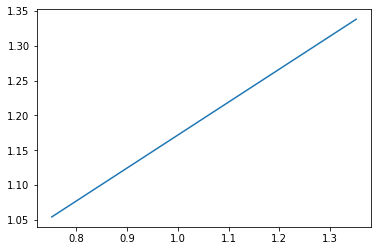

In [9]:
zz = np.exp(R*tt)*( (c1*v + c2*w)*np.cos(L*tt) 
      + (c2*v - c1*w)*np.sin(L*tt) )

plt.plot(zz[:,0],zz[:,2])

Note that eigen vectors for 90-rotated Jacoby operator can also be drawn on our portrait. If focus spiral are flattened then these vectors reflects "flattening" direction.